<a href="https://colab.research.google.com/github/wf-yamaday/machine-learning/blob/master/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%BB%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%E8%AB%96/03_Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 回帰問題

実際に解いてみる

In [0]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns; sns.set()

直線のモデル $y = a_{\text{true}} x + b_{\text{true}}$ を考える．
データは，直線モデルから，ノイズが加えられて観測したとする．
このときのノイズの標準偏差は $\sigma = 0.2$ とする

In [0]:
# さっきとはパラメータを変えているけど他意はないです．

N = 40
atrue = 1.2   #傾き
btrue = 0.5  #切片
sgm = 0.2  # ノイズの標準偏差

x = np.random.rand(N)    # [0, 1) の区間に N 個の乱数発生
ytrue = atrue * x + btrue

y = ytrue  + sgm * np.random.randn(N)  # 真値にノイズを乗せて観測データを作る

In [0]:
# ついでに 最小二乗法のコスト関数も定義しておく

def E(a, b, xobs, yobs):
    Ex = np.mean(xobs)
    Ey = np.mean(yobs)
    Exx = np.mean(xobs**2)
    Eyy = np.mean(yobs**2)
    Exy = np.mean(xobs * yobs)
    
    return 0.5 * (Eyy - 2 * a * Exy - 2 * b * Ey + a**2 * Exx + 2 * a * b * Ex + b**2)

### これで下準備完了
(x, y) にデータが入っている．これのプロットと真の直線の関係を見てみる

In [0]:
# 散布図を表示
plt.plot(x, y, 'bo', label='data')


# 真値も描画しておく
xx = np.linspace(0, 1, 128)
yy = a * xx + b

plt.plot(xx, yy, 'r-', label='true')
plt.xlim(0, 1)
plt.ylim(0.4, 1.8)
plt.legend()

## 問い: データ点（青い点）のみから，もとになる直線（赤直線）を推定することは可能か？

データの点群を $\{(x_n, y_n)\}$ とし， 推定モデルを $f(x; w) = a x + b$ とおいて， $a$ と $b$ を推定することを考える．
この問題は *最小二乗法* の問題で，　以下の関数（ロス関数と呼ばれる）
$$
    E(a, b) = \frac{1}{N} \sum_n (y_n - f(x_n))^2
$$
を，最小化する　$a, b$ を求めることを考える． 

### 要はモデル $f(x_n)$ と，観測点 $y_n$ の差（残差）が小さくなる $a, b$ を求める．


この問題は，正規方程式
$$
    \left(\begin{array}{rr} N & \sum x_n \\ \sum x_n  & \sum x_n^2 \end{array}\right) 
    \left(\begin{array}{r} b \\ a \end{array}\right)
    =
     \left(\begin{array}{r} \sum y_n \\ \sum x_n y_n \end{array}\right)
$$
を解けばよい（導出は講義で）．
解は，
$$
    \left(\begin{array}{r} b \\ a \end{array}\right)
    =
    \frac{1}{N \sum x_n^2 - (\sum x_n)^2}
    \left(\begin{array}{rr} \sum x_n^2  & - \sum x_n \\ - \sum x_n  & N\end{array}\right) 
     \left(\begin{array}{r} \sum y_n \\ \sum x_n y_n \end{array}\right)
$$


いくつかの平均値
$$
  E_x = \frac{1}{N} \sum_n x_n, \:
  E_y = \frac{1}{N} \sum_n y_n, \:
  E_{xx} = \frac{1}{N} \sum_n x_n^2, \:
  E_{xy} = \frac{1}{N} \sum_n x_n y_n
$$
を使った表現であれば，もう少し簡便にかけて
$$
    \left(\begin{array}{rr} 1 & E_x \\ E_x  & E_{xx} \end{array}\right) 
    \left(\begin{array}{r} b \\ a \end{array}\right)
    =
     \left(\begin{array}{r} E_y \\ E_{xy}\end{array}\right)
$$
が正規方程式となる．あとはこれを解けば良いので
$$
    \left(\begin{array}{r} b \\ a \end{array}\right)
    =
    \frac{1}{E_{xx} - (E_x)^2}
    \left(\begin{array}{rr} E_{xx} & -E_x \\ -E_x  & 1 \end{array}\right) 
    \left(\begin{array}{r} E_y \\ E_{xy}\end{array}\right)
$$


In [0]:
# 最小二乗法から解をもとめてみる

Ex = x.mean()
Exx = (x**2).mean()
Ey = y.mean()
Exy = x@y / N

det = Exx - (Ex)**2
b = (Ey * Exx - Ex * Exy) / det
a = (-Ex * Ey + Exy) / det

print( "a, b = (%.3f, %.3f)" % (a, b))

a, b = (1.248, 0.523)


In [0]:
# 等高線を使ってみてみる

t = np.linspace(-1, 3, 64)
aa, bb = np.meshgrid(t, t)


# 指数関数を書いてみよう
vv = np.exp( - E(aa, bb, xobs = x, yobs = y))

h = plt.contour(aa, bb, vv)

# 真値を描画しておく
plt.scatter(atrue, btrue)

# 推定値を赤で描画しておく
plt.scatter(a, b)


plt.xlabel('a')
plt.ylabel('b')


In [0]:
# 得られた直線が正しそうか　プロット してみよ

plt.plot(x, y, 'bo', label='data')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0.4, 1.8)

xx = np.linspace(0, 1, 128)
yy = atrue * xx + btrue
plt.plot(xx, yy, 'r-', label='true')
yy = a * xx + b
plt.plot(xx, yy, 'g-', label='estimate')
plt.legend() # 凡例を描画

ついでに，残差とロス関数値も評価しておこう．　残差は モデル $f(x) = a x + b$ が吐き出す予測値と $y$ の差の総和

In [0]:
# 残差を表示させてみる

residual = np.sum((y - (a * x + b))**2)
print( "Residual: %.3f" % (residual))
print( "Mean squared error %.3f" % (residual/N))   #1点あたりのズレ（平均二乗誤差）

Residual: 1.512
Mean squared error 0.038


In [0]:
## 中心化を行ってデータ推定を行う場合を考えてみなさい


## うんだいたい良さげ

でも，正規方程式とか面倒だよね．．．で，この演習では python のパッケージを使った機械学習手法を習得しましょうという話になります．
紹介コードとしては，以下の２種を提供します．

1. scikit-learn を使う
2. Keras + Tensor 使う

このレベルの問題であれば１を使うのが楽だけど，，後半の深層学習では，選択肢２がメインになるので，一応両方とも解法を記載します

## Scikit learn (sklearn) を使った解答

やらなければいけないことは，

1.  適切なモデルの `import`
2. モデルのパラメータを適合させる `fit`

だけ

In [0]:
# sklearn を使った解答

from sklearn import linear_model   # 線形モデル導入
from sklearn.metrics import mean_squared_error  # 平均二乗誤差

# モデルは，回帰(regression) なので regr という変数として扱う
regr = linear_model.LinearRegression()

#線形回帰モデル(Linear Regression()) が期待しているデータ形式は，各行にデータが入っているものなので reshape して渡す
regr.fit(x.reshape(N, 1), y.reshape(N,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

モデルを定義しました．
あとは, モデル内の fit() 関数を呼び出すだけでOK．
fit したあとは， モデル内の coef_ と intercept_ を見ればそこに解が入っています

In [0]:
print("b, a= (%.3f, %.3f)" % (regr.coef_, regr.intercept_))

b, a= (1.248, 0.523)


OK,大体あってるぽい

さらに詳しい使い方を知りたければ， scikit-learn の web ページを読むと良い（サンプルコードもいっぱいある，英語だけど）

## Keras + TensorFlow を用いた解法

TensorFlow は， Google が開発した深層学習要の枠組み（フレームワーク）です．
これだけでも使えるけど， ややマニアックな嫌いがあるので， それを噛み砕いたインターフェースが Keras だと
おもってもらってよいです（誤解をおそれずにいえばです．）

というわけなので，普通は
**こんな単純な回帰問題には使いません** ．
ここでは雰囲気を味わうためにかいてます．

Keras + TensorFlow がやっているのは **勾配法** という手法です．
scikit-learn や，正規方程式を解くみたいに問題解法をしているわけではありません．

平たく言えば，現在与えられている $a, b$ の組をもとに，ロス関数が小さくなる方向を探して，
その方向に動いていくような手段です．


In [0]:
# Keras を用いて実現せよ

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()   # 階層型のモデルを選択
model.add(Dense(1, input_shape=(1,), use_bias=True)) # 素子が一個の改装モデル

model.compile(loss='mean_squared_error',  optimizer='sgd') #最適化手法を指定

# 学習によるパラメータフィット
hist = model.fit(x, y, epochs=512, batch_size=10, verbose=1)

Text(0, 0.5, 'loss')

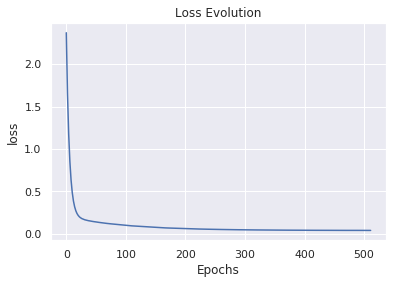

In [0]:
# ロスの値が学習によってどう変わっていくのかを表示してみる

plt.plot(hist.history['loss'])
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('loss')

かなり頑張って前出のロス値付近に収束しているぽい．
なので，　パラメータを取り出して確認してみる

In [0]:
a, b = model.get_weights()
print( "b, a = (%.3f, %.3f)" % (b, a))

b, a = (0.576, 1.140)


推定直線とデータ，真の直線を重ねて見る

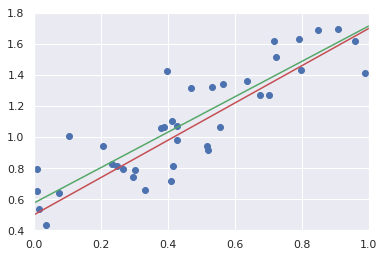

In [0]:
#w0 と w1 は，　np.array なので，使いやすいように float 型へ変換しておく
b = float(b)
a = float(a)

# あとはプロット
plt.plot(x, y, 'bo')
plt.xlim(0, 1)
plt.ylim(0.4, 1.8)

xx = np.linspace(0, 1, 128)
yy = atrue * xx + btrue
plt.plot(xx, yy, 'r-')
yy = a * xx + b
plt.plot(xx, yy, 'g-')

多分，前述の解とは微妙にずれているが，そんなに致命的ではないのを確認してください.

### 逆説的に言えば，機械学習による推定とは，そのくらいの誤差が含まれるものと認識してください．